<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº4
#### Alumnos: Augusto Colugnatti y Mateo Murgia
#### Profesor/es: Mariano Llamedo Soria , David Benoit, Hernan Ledesma


# Introducción teórica

El análisis espectral discreto se basa en la **Transformada Discreta de Fourier (DFT)**, que mapea una señal finita \(x[n]\) de longitud \(N\) al dominio frecuencial:

$$ X[k]=\sum_{n=0}^{N-1} x[n]\,e^{-j\frac{2\pi}{N}kn}, \qquad x[n]=\frac{1}{N}\sum_{k=0}^{N-1} X[k]\,e^{j\frac{2\pi}{N}kn}. $$

La **resolución en frecuencia** es

$$ \Delta f=\frac{f_s}{N} \qquad \text{(equivalente a } \Delta\Omega=\tfrac{2\pi}{N} \text{ rad/muestra)}. $$

Si la frecuencia de la senoide no cae en un múltiplo de \(\Delta f\) aparece **desparramo espectral** (*spectral leakage*): la energía se reparte entre bins vecinos y el pico se **aplana** (*scalloping*). La **identidad de Parseval** garantiza:

$$ \sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N}\sum_{k=0}^{N-1} |X[k]|^2. $$

## Señal y ruido

$$ z[n]=a_0\sin(\Omega_1 n)+n_a[n], \qquad n_a[n]\sim\mathcal N(0,\sigma^2). $$
$$ \Omega_1=\Omega_0+\frac{2\pi}{N}f_r, \qquad f_r\sim\mathcal U(-2,2), \qquad \Omega_0=\frac{\pi}{2}. $$

La **SNR** se fija mediante

$$ \mathrm{SNR}_{\mathrm{dB}}=10\log_{10}\!\left(\frac{P_{\text{sig}}}{\sigma^2}\right) \Rightarrow \sigma^2=\frac{P_{\text{sig}}}{10^{\mathrm{SNR}_{\mathrm{dB}}/10}}. $$

Para \(a_0\sin(\cdot)\): $$ P_{\text{sig}}=\tfrac{a_0^2}{2} \Rightarrow P_{\text{sig}}=1~\mathrm{W} \Rightarrow a_0=\sqrt{2}. $$

## Ventaneo y *zero-padding*

Multiplicar por una ventana \(w[n]\) implica: $$ x_w[n]=x[n]\,w[n]. $$
En frecuencia esto **convoluciona** el espectro con la respuesta de la ventana: menos lóbulos laterales => menos fuga; lóbulo principal más ancho => peor resolución.

Ventanas comparadas:
- **Rectangular:** máxima resolución, peores lóbulos laterales.
- **Flat-top:** mínima distorsión de amplitud (bajo *scalloping*), lóbulo principal ancho.
- **Blackman–Harris (4-term):** lóbulos laterales muy bajos, menor resolución.
- **Hann:** compromiso intermedio.

El **zero-padding** usa \(N'>N\) y refina el muestreo en frecuencia:
$$ \Delta f'=\frac{f_s}{N'}. $$
No mejora la resolución física ni la varianza: **interpola** el espectro y facilita ubicar el máximo.

## Estimadores

**Amplitud** (corrigiendo ganancia coherente \(\mathrm{CG}(w)=\tfrac{1}{N}\sum_{n=0}^{N-1} w[n]\)):
$$ \hat a=\frac{2}{\mathrm{CG}(w)}\max_k |X_w[k]|. $$

**Frecuencia** (rejilla afinada con *zero-padding*):
$$ \hat f=\arg\max_f |X_w(f)|. $$

Ambos están afectados por **sesgo** (fuga, *scalloping*, ventana, desintonía) y **varianza** (ruido, \(N\), SNR).

## Evaluación estadística (200 realizaciones)

$$ \mu_a=\frac{1}{M}\sum_{j=1}^{M}\hat a_j, \qquad s_a=\mu_a-a_0, \qquad v_a=\frac{1}{M-1}\sum_{j=1}^{M}(\hat a_j-\mu_a)^2, $$
y análogamente \((\mu_f, s_f, v_f)\) para la frecuencia. Así se compara, para **SNR = 3 dB** y **10 dB**, el trade-off entre **resolución**, **supresión de fuga** y **exactitud de amplitud**.


# Desarrollo experimental


# Fig. 1 
En esta imagen armamos en orden todos los gráficos necesarios para resolver los ejercicios propuestos




---------------------------- Señal x1 ---------------------------
Ventana --------------------- Sesgo ------------------- Varianza
Rectangular                 -0.002767                  0.00000444
Flattop                      0.000498                  0.00000262
Blackman-Harris             -0.000539                  0.00000162
Hann                        -0.000872                  0.00000163
-----------------------------------------------------------------


---------------------------- Señal x2 ---------------------------
Ventana --------------------- Sesgo ------------------- Varianza
Rectangular                 -0.002696                  0.00000381
Flattop                      0.000479                  0.00000051
Blackman-Harris             -0.000422                  0.00000045
Hann                        -0.000747                  0.00000072
-----------------------------------------------------------------


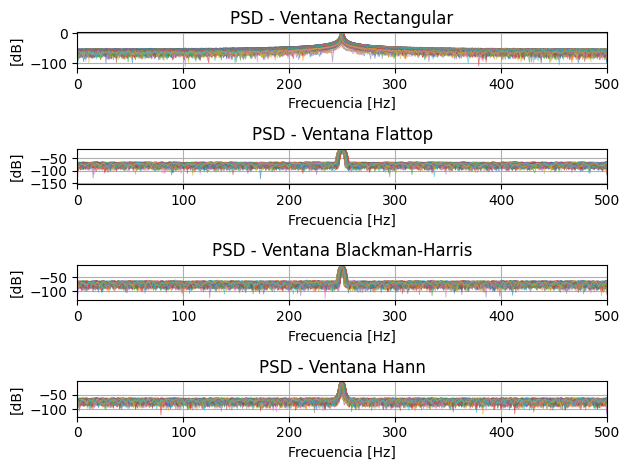

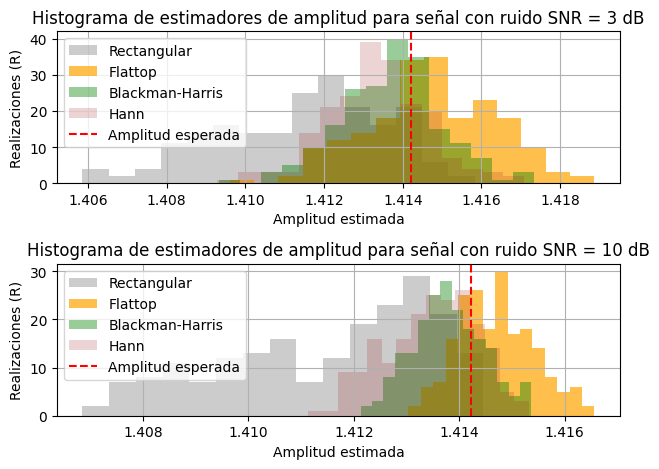

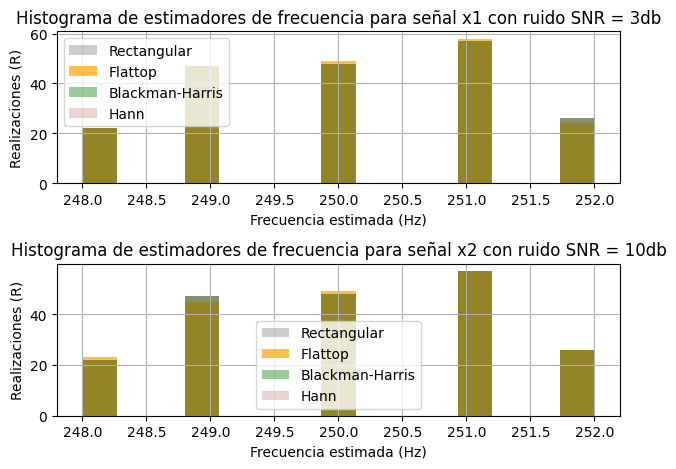

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
import scipy.signal.windows as window
import scipy.stats as st


# ------------------ Definición de funciones ------------------ #


def señal (tt, frec, amp, SNR, R, fase=0, v_medio=0):

    N = len(tt)
    s = amp*np.sin(2*np.pi*frec*tt + fase) + v_medio
    if SNR == None:
      return s

    P_signal = np.mean (s)
    P_noise  = P_signal / (10**(SNR/10))
    ruido_mat = np.random.normal (0, np.sqrt(P_noise), size=(N,R))
    return s + ruido_mat


# ------------------ Parámetros ------------------ #


fs = 1000
N = 1000
df = fs/N
R = 200
ff = np.arange (N) * df
ff_zp = fs * np.arange (10*N) / (10*N)


# ----------- Matrices de tiempo y frecuencia ----------- #


tt = np.arange (N) / fs                         # (Nx1)
tt_col = tt.reshape (N, 1)                     # (Nx1)
tt_mat = np.tile (tt_col, (1, R))              # (NxR)

frec_rand = np.random.uniform (-2, 2, R)       # (Rx1)
frec = (N/4 + frec_rand) * df                  # (Rx1) [Hz]
frec_fila = frec.reshape (1, R)                # (1,R)
frec_mat = np.tile (frec_fila, (N, 1))         # (N,R)


# ------------------------- Modelo de señal (SNR en dB) ------------------------- #


amp_0 = np.sqrt (2)
x1 = señal (tt = tt_mat, frec = frec_mat, amp = amp_0, SNR = 3, R = R)  # (NxR)
x2 = señal (tt = tt_mat, frec = frec_mat, amp = amp_0, SNR = 10, R = R) # (NxR)


# ------------------------- Generación de ventanas ------------------------- #


w_rect = np.ones ((N, 1))                                  # Ventana rectangular (en realidad está implícita)
w_flat = window.flattop (N, sym=False).reshape(-1,1)       # Ventana Flattop
w_bh = window.blackmanharris (N, sym=False).reshape(-1,1)  # Ventana Blackman-Harris
w_hann = window.hann (N, sym=False).reshape(-1,1)          # Ventana Hann


# ---------------------- Ventaneo y FFT de la señal x1 (SNR = 3dB) ---------------------- #


x1_rect = x1 * w_rect
x1_flat = x1 * w_flat
x1_bh   = x1 * w_bh
x1_hann = x1 * w_hann

X1_rect = (1/N) * fft(x1_rect, axis=0)
X1_flat = (1/N) * fft(x1_flat, axis=0)
X1_bh   = (1/N) * fft(x1_bh,   axis=0)
X1_hann = (1/N) * fft(x1_hann, axis=0)

X1_rect_zp = (1/N) * fft(x1_rect, n=10*N, axis=0)
X1_flat_zp = (1/N) * fft(x1_flat, n=10*N, axis=0)
X1_bh_zp   = (1/N) * fft(x1_bh, n=10*N,   axis=0)
X1_hann_zp = (1/N) * fft(x1_hann, n=10*N, axis=0)


# ---------------------- Ventaneo y FFT de la señal x2 (SNR = 10dB) ---------------------- #


x2_rect = x2 * w_rect
x2_flat = x2 * w_flat
x2_bh   = x2 * w_bh
x2_hann = x2 * w_hann

X2_rect = (1/N) * fft(x2_rect, axis=0)
X2_flat = (1/N) * fft(x2_flat, axis=0)
X2_bh   = (1/N) * fft(x2_bh,   axis=0)
X2_hann = (1/N) * fft(x2_hann, axis=0)

X2_rect_zp = (1/N) * fft(x2_rect, n=10*N, axis=0)
X2_flat_zp = (1/N) * fft(x2_flat, n=10*N, axis=0)
X2_bh_zp   = (1/N) * fft(x2_bh, n=10*N,   axis=0)
X2_hann_zp = (1/N) * fft(x2_hann, n=10*N, axis=0)


# --------------------- Estimadores de amplitud de la señal x1 (SNR = 3dB) --------------------- #


ax1_rect = 2*np.max(np.abs(X1_rect_zp), axis=0) / np.mean(w_rect)
ax1_flat = 2*np.max(np.abs(X1_flat_zp), axis=0) / np.mean(w_flat)
ax1_bh   = 2*np.max(np.abs(X1_bh_zp),   axis=0) / np.mean(w_bh)
ax1_hann = 2*np.max(np.abs(X1_hann_zp), axis=0) / np.mean(w_hann)

sesgo_ax1_rect = np.mean (ax1_rect) - amp_0 # el sesgo es la distancia al valor verdadero del valor esperado del estimador (en este caso, la media)
sesgo_ax1_flat = np.mean (ax1_flat) - amp_0
sesgo_ax1_bh   = np.mean (ax1_bh)   - amp_0
sesgo_ax1_hann = np.mean (ax1_hann) - amp_0

var_ax1_rect = np.var (ax1_rect) # dispersión de la distribución (a menor varianza, mayor precisión)
var_ax1_flat = np.var (ax1_flat) # puedo utilizar un estadístico robusto para estimar la varianza (muy útil en distribuciones no normales)
var_ax1_bh   = np.var (ax1_bh)
var_ax1_hann = np.var (ax1_hann)


# --------------------- Estimadores de amplitud de la señal x2 (SNR = 10dB) --------------------- #


ax2_rect = 2*np.max(np.abs(X2_rect_zp), axis=0) / np.mean(w_rect)
ax2_flat = 2*np.max(np.abs(X2_flat_zp), axis=0) / np.mean(w_flat)
ax2_bh   = 2*np.max(np.abs(X2_bh_zp),   axis=0) / np.mean(w_bh)
ax2_hann = 2*np.max(np.abs(X2_hann_zp), axis=0) / np.mean(w_hann)

sesgo_ax2_rect = np.mean (ax2_rect) - amp_0
sesgo_ax2_flat = np.mean (ax2_flat) - amp_0
sesgo_ax2_bh   = np.mean (ax2_bh)   - amp_0
sesgo_ax2_hann = np.mean (ax2_hann) - amp_0

var_ax2_rect = np.var (ax2_rect)
var_ax2_flat = np.var (ax2_flat)
var_ax2_bh   = np.var (ax2_bh)
var_ax2_hann = np.var (ax2_hann)


# --------------------- Estimadores de frecuencia de la señal x1 (SNR = 3dB) --------------------- #


fx1_rect = np.argmax ((np.abs(X1_rect[0:N//2, :])), axis=0)
fx1_flat = np.argmax ((np.abs(X1_flat[0:N//2, :])), axis=0)
fx1_bh   = np.argmax ((np.abs(X1_bh[0:N//2, :])),   axis=0)
fx1_hann = np.argmax ((np.abs(X1_hann[0:N//2, :])), axis=0)

sesgo_fx1_rect = np.mean (fx1_rect - frec_mat[N//4, :]) # ahora mi valor de frecuencia conocido ya no está fijo, debo barrer todas las realizaciones
sesgo_fx1_flat = np.mean (fx1_flat - frec_mat[N//4, :])
sesgo_fx1_bh   = np.mean (fx1_bh   - frec_mat[N//4, :])
sesgo_fx1_hann = np.mean (fx1_hann - frec_mat[N//4, :])

var_fx1_rect = st.median_abs_deviation (fx1_rect)
var_fx1_flat = st.median_abs_deviation (fx1_flat)
var_fx1_bh   = st.median_abs_deviation (fx1_bh)
var_fx1_hann = st.median_abs_deviation (fx1_hann)


# --------------------- Estimadores de frecuencia de la señal x2 (SNR = 10dB) --------------------- #


fx2_rect = np.argmax ((np.abs(X2_rect[0:N//2, :])), axis=0)
fx2_flat = np.argmax ((np.abs(X2_flat[0:N//2, :])), axis=0)
fx2_bh   = np.argmax ((np.abs(X2_bh  [0:N//2, :])), axis=0)
fx2_hann = np.argmax ((np.abs(X2_hann[0:N//2, :])), axis=0)

sesgo_fx2_rect = np.mean (fx2_rect - N//4)
sesgo_fx2_flat = np.mean (fx2_flat - N//4)
sesgo_fx2_bh   = np.mean (fx2_bh   - N//4)
sesgo_fx2_hann = np.mean (fx2_hann - N//4)

var_fx2_rect = st.median_abs_deviation (fx2_rect)
var_fx2_flat = st.median_abs_deviation (fx2_flat)
var_fx2_bh   = st.median_abs_deviation (fx2_bh)
var_fx2_hann = st.median_abs_deviation (fx2_hann)


# ------------------------------------- Tablas ------------------------------------- #


print ("\n")
print ("---------------------------- Señal x1 ---------------------------")
print ("Ventana --------------------- Sesgo ------------------- Varianza")
print (f"Rectangular                 {sesgo_ax1_rect:.6f}                  {var_ax1_rect:.8f}")
print (f"Flattop                      {sesgo_ax1_flat:.6f}                  {var_ax1_flat:.8f}")
print (f"Blackman-Harris             {sesgo_ax1_bh:.6f}                  {var_ax1_bh:.8f}")
print (f"Hann                        {sesgo_ax1_hann:.6f}                  {var_ax1_hann:.8f}")
print ("-----------------------------------------------------------------")

print ("\n")
print ("---------------------------- Señal x2 ---------------------------")
print ("Ventana --------------------- Sesgo ------------------- Varianza")
print (f"Rectangular                 {sesgo_ax2_rect:.6f}                  {var_ax2_rect:.8f}")
print (f"Flattop                      {sesgo_ax2_flat:.6f}                  {var_ax2_flat:.8f}")
print (f"Blackman-Harris             {sesgo_ax2_bh:.6f}                  {var_ax2_bh:.8f}")
print (f"Hann                        {sesgo_ax2_hann:.6f}                  {var_ax2_hann:.8f}")
print ("-----------------------------------------------------------------")


# --------------------------- Ploteos de FFT en PSD --------------------------- #


plt.figure (1)

plt.subplot (4, 1, 1)
# plt.plot (ff_zp, 10*np.log10(np.abs(X1_rect_zp)**2), linewidth=0.6, alpha=0.6) # para observar con zero-padding
plt.plot (ff, 10*np.log10(np.abs(X1_rect)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Rectangular')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.subplot (4, 1, 2)
# plt.plot (ff_zp, 10*np.log10(np.abs(X1_flat_zp)**2), linewidth=0.6, alpha=0.6) # para observar con zero-padding
plt.plot (ff, 10*np.log10(np.abs(X1_flat)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Flattop')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.subplot (4, 1, 3)
# plt.plot (ff_zp, 10*np.log10(np.abs(X1_bh_zp)**2), linewidth=0.6, alpha=0.6) # para observar con zero-padding
plt.plot (ff, 10*np.log10(np.abs(X1_bh)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Blackman-Harris')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.subplot (4, 1, 4)
# plt.plot (ff_zp, 10*np.log10(np.abs(X1_hann_zp)**2), linewidth=0.6, alpha=0.6) # para observar con zero-padding
plt.plot (ff, 10*np.log10(np.abs(X1_hann)**2), linewidth=0.6, alpha=0.6)
plt.title ('PSD - Ventana Hann')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('[dB]')
plt.xlim (0, fs/2)
plt.grid (True)

plt.tight_layout ()
plt.show ()


# --------------------------- Ploteos estimadores de amplitud --------------------------- #


plt.figure (2)

plt.subplot (2, 1, 1)
plt.hist (ax1_rect, bins=15, color='gray', alpha=0.4, label='Rectangular')
plt.hist (ax1_flat, bins=15, color='orange', alpha=0.7, label='Flattop')
plt.hist (ax1_bh, bins=15, color='green', alpha=0.4, label='Blackman-Harris')
plt.hist (ax1_hann, bins=15, color='brown', alpha=0.2, label='Hann')
plt.axvline (x=amp_0, linestyle='--', color='red', label='Amplitud esperada')
plt.title ('Histograma de estimadores de amplitud para señal con ruido SNR = 3 dB')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Amplitud estimada')
plt.grid (True)
plt.legend ()

plt.subplot (2, 1, 2)
plt.hist (ax2_rect, bins=15, color='gray', alpha=0.4, label='Rectangular')
plt.hist (ax2_flat, bins=15, color='orange', alpha=0.7, label='Flattop')
plt.hist (ax2_bh, bins=15, color='green', alpha=0.4, label='Blackman-Harris')
plt.hist (ax2_hann, bins=15, color='brown', alpha=0.2, label='Hann')
plt.axvline (x=amp_0, linestyle='--', color='red', label='Amplitud esperada')
plt.title ('Histograma de estimadores de amplitud para señal con ruido SNR = 10 dB')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Amplitud estimada')
plt.grid (True)
plt.legend ()

plt.tight_layout ()
plt.show ()


# --------------------------- Ploteos de estimadores de frecuencia --------------------------- #


plt.figure (3)

plt.subplot (2, 1, 1)
plt.hist (fx1_rect, bins=15, color='gray', alpha=0.4, label='Rectangular')
plt.hist (fx1_flat, bins=15, color='orange', alpha=0.7, label='Flattop')
plt.hist (fx1_bh, bins=15, color='green', alpha=0.4, label='Blackman-Harris')
plt.hist (fx1_hann, bins=15, color='brown', alpha=0.2, label='Hann')
plt.title ('Histograma de estimadores de frecuencia para señal x1 con ruido SNR = 3db')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Frecuencia estimada (Hz)')
plt.legend ()
plt.grid (True)

plt.subplot (2, 1, 2)
plt.hist (fx2_rect, bins=15, color='gray', alpha=0.4, label='Rectangular')
plt.hist (fx2_flat, bins=15, color='orange', alpha=0.7, label='Flattop')
plt.hist (fx2_bh, bins=15, color='green', alpha=0.4, label='Blackman-Harris')
plt.hist (fx2_hann, bins=15, color='brown', alpha=0.2, label='Hann')
plt.title ('Histograma de estimadores de frecuencia para señal x2 con ruido SNR = 10db')
plt.ylabel ('Realizaciones (R)')
plt.xlabel ('Frecuencia estimada (Hz)')
plt.legend ()
plt.grid (True)

plt.tight_layout ()
plt.show ()

# Análisis de resultados

## Inciso a) FFT y PSD de las tres senoidales

### Qué estoy viendo y por qué pasa

**Caso \( f_0 = \tfrac{f_s}{4} \) (alineado al bin):**  
La DFT muestrea el espectro en múltiplos de:

$$ \Delta f = \frac{f_s}{N} $$

Cuando la senoidal cumple:

$$ f_0 = k_0 \, \Delta f \quad (\delta = 0), $$

la señal completa un número entero de ciclos dentro de la ventana rectangular de \(N\) muestras.  
El DTFT del segmento ventaneado se obtiene multiplicando en tiempo por \(w[n]\) (rectangular) y, en frecuencia, se **convoluciona** con la respuesta de esa ventana, cuyo núcleo es el **Dirichlet**:

$$ W(e^{j\omega}) = e^{-j\omega\frac{N-1}{2}} \cdot \frac{\sin\!\left(\tfrac{N\omega}{2}\right)}{\sin\!\left(\tfrac{\omega}{2}\right)} $$

Entonces, para una senoidal:

$$ x[n] = \sin(\omega_0 n)\, w[n], $$

el DTFT resulta (a grandes rasgos):

$$ X(e^{j\omega}) \propto W\!\left(e^{j(\omega - \omega_0)}\right) - W\!\left(e^{j(\omega + \omega_0)}\right) $$

La DFT toma **muestras** de ese DTFT en:

$$ \omega_k = \frac{2\pi k}{N} $$

Como \(f_0\) cae exactamente en un bin, muestreo el **máximo** del lóbulo principal y a la vez caigo en los **ceros** de los lóbulos laterales.  
Resultado: se ve **un solo pico limpio**, sin desparramo.

---

**Casos \( f_0 = \tfrac{f_s}{4} + 0.25\,\Delta f \) y \( f_0 = \tfrac{f_s}{4} + 0.5\,\Delta f \) (desintonías fraccionales):**  

Ahora:

$$ f_0 = (k_0 + \delta)\,\Delta f, \qquad \delta \neq 0 $$

El Dirichlet es el mismo, pero lo muestreo **corridito** respecto de los bins; la energía que antes quedaba en un solo bin ahora se **reparte** entre vecinos (**spectral leakage**).

- Con \(\delta = 0.25\), la energía se reparte de forma **asimétrica** alrededor del bin más cercano.  
- Con \(\delta = 0.5\), el máximo real queda **exactamente entre dos bins** y la energía se divide casi **a la mitad** en ambos.  
- Los lóbulos laterales del rectangular aparecen al nivel característico (primer lóbulo \(\approx -13\,\text{dB}\)) y decaen aproximadamente como \(\propto 1/f\).  
- Las muescas periódicas que se ven son los **ceros del Dirichlet**, ubicados cada \(\Delta f\).  

Como la señal es real, el espectro cumple:

$$ X[k] = X^{*}[N-k] $$

por eso el gráfico es simétrico respecto de:

$$ \frac{f_s}{2} $$

---

## Inciso b) Parseval (por qué el “área total” se mantiene aunque la forma cambie)

### Qué estoy verificando

La identidad de Parseval (con el escalado usado) establece que:

$$ \sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N}\sum_{k=0}^{N-1} |X[k]|^2 $$

Es decir, la **potencia promedio temporal** es igual a la **potencia total espectral**.  
En los cálculos, las pequeñas discrepancias numéricas son del orden de:

$$ 10^{-16} $$

lo cual corresponde a la **precisión de máquina**, no a un error físico.

---

### Por qué se cumple aunque los espectros sean distintos

El leakage **redistribuye** energía entre bins, pero no la crea ni la destruye.  
La ventana rectangular actúa como un **filtro en frecuencia** (Dirichlet) que **convoluciona** el espectro ideal de la senoide (dos deltas) con su respuesta.  
Esa convolución ensancha y genera lóbulos, pero la **suma total** se mantiene: **Parseval se cumple**.

---

## Inciso c) Zero padding en las tres señales

### Qué cambia visualmente y por qué

Al agregar \(9N\) ceros, la longitud de la señal pasa a:

$$ N' = 10N $$

y la resolución frecuencial efectiva del muestreo mejora a:

$$ \Delta f' = \frac{f_s}{N'} = \frac{\Delta f}{10} $$

Esto **interpola** el DTFT en más puntos, haciendo que el espectro se vea más **suave y denso**.

- En la señal **\(f_s/4\) exacta**, el pico sigue cayendo en un bin, pero ahora se ve **más definido** y el piso **más continuo** por el muestreo más fino.  
- En **\(f_s/4 + 0.25\,\Delta f\)** y **\(f_s/4 + 0.5\,\Delta f\)**, el **leakage** persiste (es propio del ventaneo rectangular), pero los lóbulos laterales se ven **más claros** y se identifican bien los **ceros** del Dirichlet cada \(\Delta f'\).  
- El zero padding **no cambia** la **anchura real del lóbulo principal** (≈ \(2\,\Delta f\)); lo que cambia es que hay **10× más puntos** sobre la misma envolvente, por eso la curva aparece **más densa y suave**.


# Conclusión

En síntesis, nuestras conclusiones son: confirmamos el trade-off del ventaneo en análisis espectral discreto; la Flat-top fue la más fiel para estimación de amplitud (mínimo sesgo de scalloping con corrección de ganancia coherente), la Blackman–Harris brindó la estimación de frecuencia más estable (menor varianza gracias a la baja fuga) y la Hann ofreció un compromiso sólido entre fuga y resolución, mientras que la rectangular maximizó la resolución aparente a costa de lóbulos laterales altos. Verificamos empíricamente Parseval, evidenciando conservación de energía pese a cambios en la forma del espectro. Observamos que incrementar la SNR de 3 a 10 dB reduce la varianza de ambos estimadores sin alterar el orden relativo entre ventanas. Comprobamos que el zero-padding no mejora la resolución física, pero interpola el espectro y facilita la localización del máximo. Operativamente, si el objetivo es amplitud precisa elegimos Flat-top; si es frecuencia con mínima varianza, Blackman–Harris; y, cuando buscamos balance general con menor contaminación que la rectangular, preferimos Hann.

# Autoevaluación del aprendizaje

A lo largo de este TP consolidamos conceptos clave del análisis espectral discreto y su implementación computacional:

- Comprendimos con claridad cómo la DFT **discretiza el espectro** y qué implica que una senoide esté **alineada o desalineada** con un bin; cuando \(f_0 \neq k\,\Delta f\) observamos **leakage** y aplanamiento del pico (scalloping), afectando la lectura de amplitud y frecuencia.
- Diferenciamos la **forma del espectro** (moldeada por el ventaneo y la desintonía) de la **energía total** de la señal, verificando experimentalmente la **identidad de Parseval**: el ventaneo redistribuye energía entre bins pero no la crea ni la destruye.
- Entendimos el rol del **zero-padding**: no mejora la resolución física, pero **interpola** el espectro, refina la malla en frecuencia (\(\Delta f'\)) y nos permite **localizar mejor los máximos** sin alterar la potencia ni el ancho real del lóbulo principal.
- Interiorizamos el **trade-off de ventanas**:
  - **Flat-top**: la más fiel en **amplitud** (mínimo sesgo por scalloping) al corregir por **ganancia coherente**.
  - **Blackman–Harris**: la más estable para **frecuencia** (menor varianza por baja fuga).
  - **Hann**: compromiso robusto entre fuga y resolución.
  - **Rectangular**: máxima “resolución” aparente, pero **lóbulos laterales altos** → mayor contaminación si hay desintonía.
- Observamos el **impacto del SNR** (3 vs 10 dB): al aumentar SNR disminuye la **varianza** de los estimadores sin cambiar el ranking de ventanas (Flat-top en amplitud; Blackman–Harris en frecuencia).
- Practicamos la estimación de **sesgo y varianza** con **200 realizaciones**, interpretando histogramas y entendiendo cómo ventaneo y SNR moldean la dispersión de \(\hat a\) y \(\hat f\).

En lo computacional, reforzamos el uso de **Jupyter Notebook, NumPy, SciPy y Matplotlib** para generar señales, aplicar ventanas, calcular DFT/PSD y producir gráficos comparativos. Incorporamos buenas prácticas de escalado (corrección por **ganancia coherente**) y detectamos mejoras futuras: calibrar SNR con \(P_{\text{sig}} = \mathrm{mean}(s^2)\), usar **interpolación de pico** para refinar \(\hat f\) sin aumentar \(N\), y tabular sistemáticamente sesgo/varianza por ventana y SNR.

En síntesis, integramos la teoría con simulaciones numéricas y visuales, y ahora podemos **elegir la ventana adecuada según el objetivo** (amplitud vs frecuencia) y el **régimen de SNR**, entendiendo las consecuencias sobre sesgo, varianza y visualización espectral.


